In [44]:
# 판다스 라이브러리 불러오기
import pandas as pd
import konlpy
from konlpy.tag import Okt
tokenizer = Okt()

In [45]:
# 토큰화 (형태소 단위)
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
tokenizer.morphs(text)

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [46]:
# 토큰화 (명사만 추출)
tokenizer.nouns(text)

['탐험', '학교']

In [47]:
# 토큰화 (품사 태깅)
tokenizer.pos(text)

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('AIFFEL', 'Alpha')]

In [48]:
# CountVectorizer
# 원핫인코딩
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [49]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(text)

In [50]:
# 데이터 학습
vect.fit(words)

CountVectorizer()

In [51]:
# 학습된 어휘
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [52]:
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [53]:
df_t = vect.transform(words) # 원핫인코딩으로 변환
df_t.toarray()


array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [54]:
# 어휘와 피처 
import pandas as pd
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


In [55]:
# 새로운 단어를 이 사전에 매칭하는걸 실험
test = "AI 공부하며 함께 성장해요!"

In [56]:
words = tokenizer.morphs(test)
words

['AI', '공부', '하며', '함께', '성장해요', '!']

In [57]:
test_t = vect.transform(words)
test_t.toarray()

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [58]:
test_df = pd.DataFrame(test_t.toarray(), columns=vect.get_feature_names_out())
test_df

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


### TfidfVectorizer

In [59]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
vect = TfidfVectorizer()
words = tokenizer.morphs(text)
vect.fit(words)
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [61]:
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [62]:
vect.transform(words).toarray()

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

### 감성분석

이번 시간에는 감성 분석을 함께 진행해 보겠습니다.

이번 시간 정리

머신러닝 프로세스에서 자연어 전처리 부분 살펴보기

In [63]:
import pandas as pd

In [64]:
# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")

In [65]:
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [66]:
df.shape

(150000, 3)

In [67]:
# 타겟 확인
df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [68]:
# 결측치
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [69]:
# 결측치 삭제
print(df.shape)
df = df.dropna()
print(df.shape)

(150000, 3)
(149995, 3)


In [70]:
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<Axes: ylabel='Frequency'>

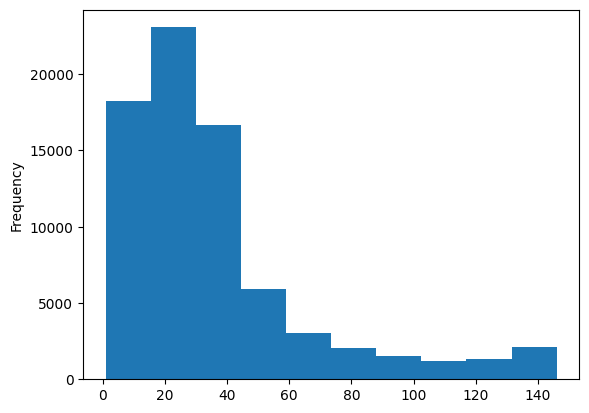

In [71]:
# len 시각화 (label == 0) 
import matplotlib.pyplot as plt
df[df.label==0]['len'].plot(kind='hist') # 부정에서  길이별로

<Axes: ylabel='Frequency'>

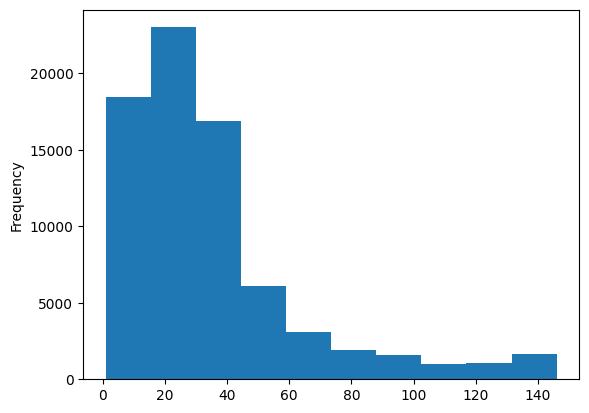

In [72]:
# len 시각화 (label == 1) 
df[df.label==1]['len'].plot(kind='hist')

In [73]:
# 데이터 샘플링
df = df[:1000]
# 토큰화 그리고 인코딩까지
vect = CountVectorizer(tokenizer=tokenizer.morphs)  
vectors = vect.fit_transform(df['document']) # 다큐먼트로 사전만들기
vectors

/Users/soma/anaconda3/envs/tensor2/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<1000x4767 sparse matrix of type '<class 'numpy.int64'>'
	with 13441 stored elements in Compressed Sparse Row format>

### 머신러닝 > 교차검증

[리마인드] 교차검증이란?

일반적으로 모델을 학습시킬 때 데이터를 train set과 test set으로 나누어 train set을 가지고 학습을 수행합니다.
교차검증이란 여기서 train set을 다시 train set과 validation set으로 나누어 학습 중 검증과 수정을 수행하는 것을 의미합니다.
[리마인드] F1 이란?

분류 모델의 평가 지표 중 하나로, 정밀도(precision)와 재현율(recall)의 조화평균을 나타냅니다.
<참고> 5. 지도학습(분류) 노드의 5-5. 교차검증, 5-6. 평가(분류) 스텝에서 복습하실 수 있습니다.

In [74]:
# 머신러닝
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5)

array([0.64772727, 0.62721893, 0.70157068, 0.71428571, 0.62637363])

### 자연어 전처리

어휘 사전 구축
00% 이상 나타나는 단어 무시
최소 N개의 문장에만 나타나는 단어만 유지
불용어(stopword)
큰 의미가 없는 단어
예) 을, 는, 이, 가, 여기, 저기
띄어쓰기
반복되는 글자 정리
맞춤법 검사

### 1. 어휘사전구축

In [75]:
# 토큰화(max_df) N개 보다 큰 단어 수 무시
vect = CountVectorizer(tokenizer=tokenizer.morphs, max_df=10) # 10번이상 등장한 단어는 무시
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

/Users/soma/anaconda3/envs/tensor2/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.643

In [76]:
# 토큰화(min_df) N개 보다 작은 단어 수 무시
vect = CountVectorizer(tokenizer=tokenizer.morphs, min_df=2)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

/Users/soma/anaconda3/envs/tensor2/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.689

### 2. 불용어 

In [77]:
# stop_words 
stop_words = ['에서','해요']
vect = CountVectorizer(stop_words=stop_words)
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

### 3. 띄어쓰기

In [81]:
# 띄어쓰기
from pykospacing import Spacing
spacing = Spacing()

text = "함께탐험하며성장하는AI학교아이펠"
spacing_test = spacing(text)
print(text)
print(spacing_test)

함께탐험하며성장하는AI학교아이펠
함께 탐험하며 성장하는 AI학교 아이펠


### 4. 반복되는 글자 정리

In [83]:
# 댓글 데이터에 등장하는 반복되는 이모티콘의 정리
from soynlp.normalizer import *

emoticon_normalize('하하하하ㅋㅋㅋㅋㅋㅠㅠㅠㅠㅠㅠ', num_repeats=2)

'하하하ㅋㅋㅠㅠ'

### 5. 맞춤법 검사기

In [94]:
# 맞춤법 검사
from hanspell import spell_checker
text = '알파고 이전, 2015년부터 만들 어진 최초의AI 커뮤니티 모두의연구소.학연, 지연, 모두연이라는 말이나올만큼 AI의 보금자리로서 중요한 역할을 하고있는 모두의연구소에서 만들었습니다. AI기술을 커뮤니티로 배우는 유일 한 기관 아이펠과 함께 밝은 미래를 만들어보세요.'


In [95]:
spell_checker.check(text)

KeyError: 'result'